In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = (np.sin(5 * (np.pi) * x)) / (5 * np.pi * x)
print(y.shape)

(300, 1)
(300, 1)


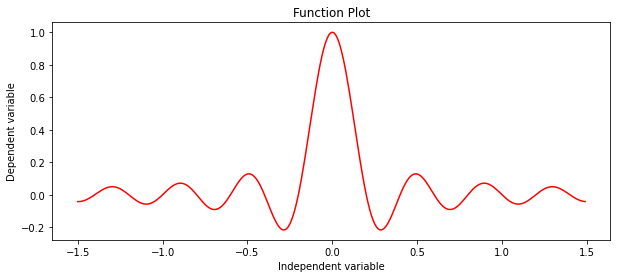

In [4]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [5]:
def train_neural_network(model, input_data, target_data):
    epochs = 2000
    loss_history = []
    epoch_indices = []
    grad_arr = []
    is_converged = False
    min_gradient = 0
    final_loss = 0
    for epoch in range(epochs):
        if is_converged:
            return epoch_indices, loss_history, model_predictions, grad_arr

        model_predictions = model(input_data)
        current_loss = loss_function(model_predictions, target_data)
        optimizer.zero_grad()
        current_loss.backward()
        optimizer.step()
        epoch_indices.append(epoch)
        loss_history.append(current_loss.item())

        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        
        grad_arr.append(grad_norm)


        total_parameters = sum(p.numel() for p in model.parameters())
        if grad_norm < 0.001 or epoch == epochs - 1:
            print('Gradient norm has minimized')
            updated_predictions = model(input_data)
            final_loss = loss_function(updated_predictions, target_data)

            # Compute the Hessian matrix
            hessian = torch.zeros((total_parameters, total_parameters))
            loss_grads = torch.autograd.grad(final_loss, model.parameters(), create_graph=True)
            flattened_grads = torch.cat([g.view(-1) for g in loss_grads])
            for i in range(total_parameters):
                grad2 = torch.autograd.grad(flattened_grads[i], model.parameters(), retain_graph=True)
                hessian[i] = torch.cat([g.view(-1) for g in grad2])

            eigenvalues = torch.linalg.eigh(hessian).eigenvalues
            positive_eigen_count = (eigenvalues > 0).sum().item()
            minimal_ratio = positive_eigen_count / total_parameters
            print(f'Minimal Ratio: {minimal_ratio}, Loss: {final_loss.item()}, Epoch: {epoch}')
            final_loss = final_loss.item()
            break

    print('Training process completed')
    return final_loss, minimal_ratio


In [6]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.lin1 = nn.Linear(1, 4)
        self.lin2 = nn.Linear(4, 9)
        self.lin3 = nn.Linear(9, 12)
        self.lin4 = nn.Linear(12, 10)
        self.lin5 = nn.Linear(10, 10)
        self.lin6 = nn.Linear(10, 10)
        self.lin7 = nn.Linear(10, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = F.leaky_relu(self.lin1(x))
        x = F.leaky_relu(self.lin2(x))
        x = F.leaky_relu(self.lin3(x))
        x = F.leaky_relu(self.lin4(x))
        x = F.leaky_relu(self.lin5(x))
        x = F.leaky_relu(self.lin6(x))
        x = F.leaky_relu(self.lin7(x))
        x = self.predict(x)
        return x
model = Model()

In [7]:
loss_arr = []
min_ratio_arr = []
for index in range(100):
    print("Model ", index)
    model = Model()
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-4)
    loss_value, min_ratio = train_neural_network(model, x, y)
    loss_arr.append(loss_value)
    min_ratio_arr.append(min_ratio)

Model  0
Gradient norm has minimized
Minimal Ratio: 0.5087412587412588, Loss: 0.0017892889445647597, Epoch: 736
Training process completed
Model  1
Gradient norm has minimized
Minimal Ratio: 0.5174825174825175, Loss: 0.0021946963388472795, Epoch: 1570
Training process completed
Model  2
Gradient norm has minimized
Minimal Ratio: 0.4807692307692308, Loss: 0.061309121549129486, Epoch: 47
Training process completed
Model  3
Gradient norm has minimized
Minimal Ratio: 0.5262237762237763, Loss: 0.0012796827359125018, Epoch: 1999
Training process completed
Model  4
Gradient norm has minimized
Minimal Ratio: 0.486013986013986, Loss: 0.061311982572078705, Epoch: 163
Training process completed
Model  5
Gradient norm has minimized
Minimal Ratio: 0.4772727272727273, Loss: 0.06130904331803322, Epoch: 61
Training process completed
Model  6
Gradient norm has minimized
Minimal Ratio: 0.48776223776223776, Loss: 0.06128496676683426, Epoch: 86
Training process completed
Model  7
Gradient norm has minimiz

Gradient norm has minimized
Minimal Ratio: 0.5157342657342657, Loss: 0.0021582329645752907, Epoch: 1999
Training process completed
Model  60
Gradient norm has minimized
Minimal Ratio: 0.479020979020979, Loss: 0.06130959093570709, Epoch: 218
Training process completed
Model  61
Gradient norm has minimized
Minimal Ratio: 0.48776223776223776, Loss: 0.05829184874892235, Epoch: 370
Training process completed
Model  62
Gradient norm has minimized
Minimal Ratio: 0.5192307692307693, Loss: 0.0015376590890809894, Epoch: 1961
Training process completed
Model  63
Gradient norm has minimized
Minimal Ratio: 0.5122377622377622, Loss: 0.0022293103393167257, Epoch: 1999
Training process completed
Model  64
Gradient norm has minimized
Minimal Ratio: 0.479020979020979, Loss: 0.06130722537636757, Epoch: 152
Training process completed
Model  65
Gradient norm has minimized
Minimal Ratio: 0.527972027972028, Loss: 0.0012189858825877309, Epoch: 1262
Training process completed
Model  66
Gradient norm has minimi

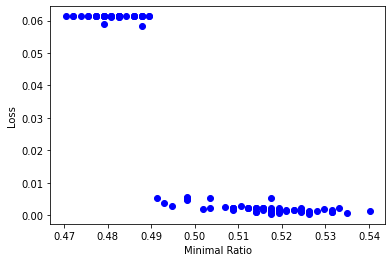

In [8]:
plt.scatter(min_ratio_arr,loss_arr, color = "blue")
plt.xlabel("Minimal Ratio")
plt.ylabel("Loss")
plt.show()